In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv("INR.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2021-12-27  75.115196  75.142998  74.908600  75.315002  75.315002       0
1  2021-12-28  74.980301  75.224800  74.579498  74.980301  74.980301       0
2  2021-12-29  74.738602  74.836403  74.502998  74.745003  74.745003       0
3  2021-12-30  74.570297  74.646202  74.293999  74.570297  74.570297       0
4  2021-12-31  74.432297  74.642502  74.089996  74.431198  74.431198       0


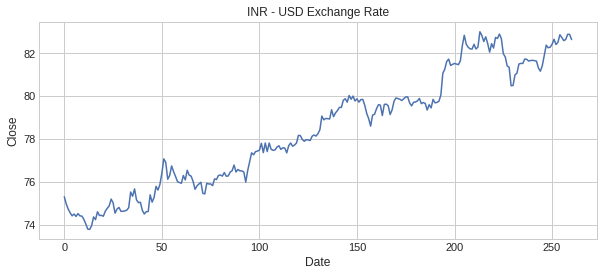

In [3]:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.997840  0.998140  0.999947   0.999947     NaN
High       0.997840  1.000000  0.997402  0.997807   0.997807     NaN
Low        0.998140  0.997402  1.000000  0.998111   0.998111     NaN
Close      0.999947  0.997807  0.998111  1.000000   1.000000     NaN
Adj Close  0.999947  0.997807  0.998111  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


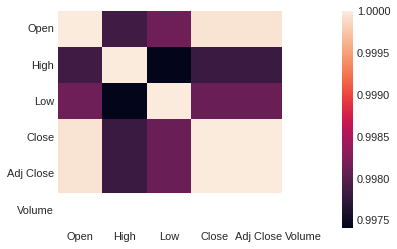

In [4]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [5]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [7]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0       74.658302
1       79.766701
2       79.895103
3       75.917297
4       79.194801
